---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.15 - Clustering: Customer Segmentation

### Imports and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
URL = "https://github.com/anvarnarz/praktikum_datasets/blob/main/customer_segmentation.csv?raw=True"
df = pd.read_csv(URL)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Id,850.0,425.500000,245.518160,1.000,213.25000,425.500,637.75000,850.000
Age,850.0,35.029412,8.041432,20.000,29.00000,34.000,41.00000,56.000
Edu,850.0,1.710588,0.927784,1.000,1.00000,1.000,2.00000,5.000
Years Employed,850.0,8.565882,6.777884,0.000,3.00000,7.000,13.00000,33.000
Income,850.0,46.675294,38.543054,13.000,24.00000,35.000,55.75000,446.000
Card Debt,850.0,1.576820,2.125843,0.012,0.38250,0.885,1.89850,20.561
Other Debt,850.0,3.078773,3.398799,0.046,1.04575,2.003,3.90325,35.197
Defaulted,700.0,0.261429,0.439727,0.000,0.00000,0.000,1.00000,1.000
DebtIncomeRatio,850.0,10.171647,6.719441,0.100,5.10000,8.700,13.80000,41.300


### Data Preprocessing

Drop categorical (`Address`) column:

In [5]:
df.drop(columns=['Address'], inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Standardizing**\
We standardize all columns except the `Customer Id`.

In [6]:
X = df.values[:, 1:]
X = np.nan_to_num(X)  # Replace NaN with zero
data = StandardScaler().fit_transform(X)
data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Machine Learning

In [7]:
k_means = KMeans(n_clusters=3)
k_means.fit(data)

C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
pd.value_counts(k_means.labels_)

2    537
1    166
0    147
dtype: int64

**Customers have divided into clusters. Let's add this data to df:**

In [9]:
df['cluster'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


### What can we say about clusters?

We can get information about clusters by finding the centroid of each cluster. For this, we can use `groupby` and `mean` methods:

In [10]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


**What can be inferred about the customers in each cluster?**

- If we look at the `Age`, `cluster 0` is adults (43+), `cluster 1` is young people (up to 31), `cluster 2` is middle age (33+).
- The columns that clearly distinguish each cluster are `Years Employed` and `Income`.
- So we can define each cluster as:
    - *Cluster 0* - Adults, have a long experience, large income customers.
    - *Cluster 1* - Young, less experienced and lower income customers.
    - *Cluster 2* - Middle age, 7+ years of experience, low income customers.

In general, you can name clusters according to the columns that are important to your business, for example, if you run a financial service (term payment, loan), you should give importance to the `Debt` and `Defaulted` columns.

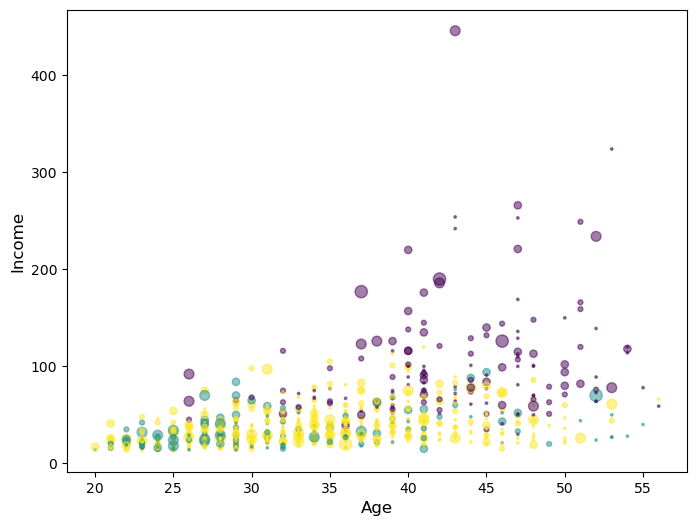

In [11]:
plt.figure(figsize=(8, 6))
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_, alpha=0.5)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.show()

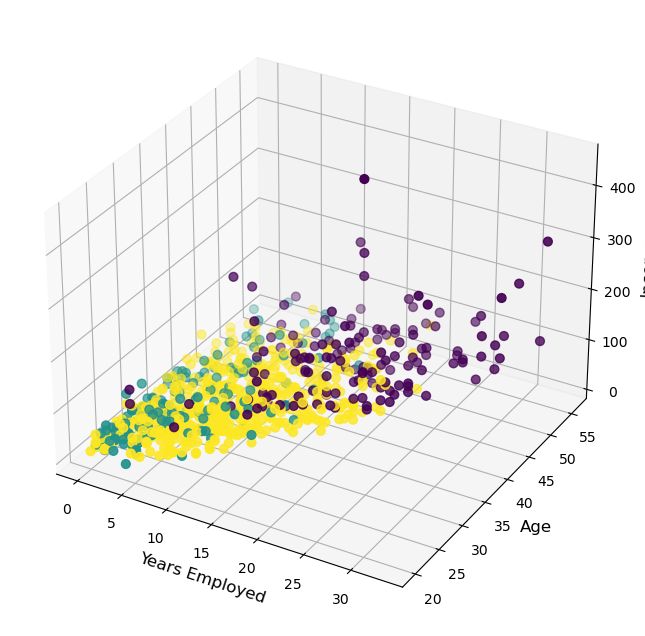

In [12]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

x = df['Years Employed']
y = df['Age']
z = df['Income']

ax.scatter(x, y, z, c=k_means.labels_, s=40)

# Set axis labels
ax.set_xlabel('Years Employed', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_zlabel('Income', fontsize=12)

plt.show()